In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from scipy.stats import skew
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Automobile_data.csv')

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [4]:
df['normalized-losses'].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [5]:
df.replace('?', np.nan, inplace=True)

In [6]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
body-style            0
drive-wheels          0
engine-location       0
width                 0
height                0
engine-type           0
engine-size           0
horsepower            2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [7]:
df['normalized-losses']=df['normalized-losses'].astype(float)
normalized_losses_mean=df['normalized-losses'].mean()
df['normalized-losses'].fillna(normalized_losses_mean, inplace=True)

In [8]:
df['horsepower']=df['horsepower'].astype(float)
horsepower_mean=df['horsepower'].mean()
df['horsepower'].fillna(horsepower_mean, inplace=True)

In [9]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
body-style            object
drive-wheels          object
engine-location       object
width                float64
height               float64
engine-type           object
engine-size            int64
horsepower           float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [10]:
le = LabelEncoder()

In [11]:
df_object=df.select_dtypes(object)
df_object.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,alfa-romero,gas,convertible,rwd,front,dohc
1,alfa-romero,gas,convertible,rwd,front,dohc
2,alfa-romero,gas,hatchback,rwd,front,ohcv
3,audi,gas,sedan,fwd,front,ohc
4,audi,gas,sedan,4wd,front,ohc


In [12]:
for col in df_object:
    df[col]=le.fit_transform(df[col])

In [13]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,0,1,0,2,0,64.1,48.8,0,130,111.0,21,27,13495
1,3,122.0,0,1,0,2,0,64.1,48.8,0,130,111.0,21,27,16500
2,1,122.0,0,1,2,2,0,65.5,52.4,5,152,154.0,19,26,16500
3,2,164.0,1,1,3,1,0,66.2,54.3,3,109,102.0,24,30,13950
4,2,164.0,1,1,3,0,0,66.4,54.3,3,136,115.0,18,22,17450


In [14]:
df.dtypes

symboling              int64
normalized-losses    float64
make                   int32
fuel-type              int32
body-style             int32
drive-wheels           int32
engine-location        int32
width                float64
height               float64
engine-type            int32
engine-size            int64
horsepower           float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [15]:
#corr_price = df.corr()['price']
#filtered_corr = corr_price[(corr_price > -0.5) & (corr_price < 0.5)]
#corr_list = (filtered_corr.index)
#corr_list
'''This is mixed type data thus we do not use corelation'''

'This is mixed type data thus we do not use corelation'

In [16]:
X = df.drop(columns='price')
Y = df['price']

In [17]:
X.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,3,122.0,0,1,0,2,0,64.1,48.8,0,130,111.0,21,27
1,3,122.0,0,1,0,2,0,64.1,48.8,0,130,111.0,21,27
2,1,122.0,0,1,2,2,0,65.5,52.4,5,152,154.0,19,26
3,2,164.0,1,1,3,1,0,66.2,54.3,3,109,102.0,24,30
4,2,164.0,1,1,3,0,0,66.4,54.3,3,136,115.0,18,22


In [18]:
ss = StandardScaler()

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [21]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((143, 14), (62, 14), (143,), (62,))

In [22]:
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [24]:
lr.fit(X_train, Y_train)

LinearRegression()

In [25]:
lr.coef_

array([   57.81895665,    44.47885193, -1253.87858019,  -178.99929397,
        -149.85563859,  1058.52249069,  2352.26450278,  1700.08139295,
         918.27940669,   309.65276269,  4046.25518791,  -450.43882012,
        1968.72478882, -2781.47379917])

In [26]:
lr.intercept_

13483.55944055944

In [27]:
dict = {'slope':lr.coef_ , 'Input': X.columns }
Data =pd.DataFrame(dict)
Data.head()

,slope,Input
0,57.818957,symboling
1,44.478852,normalized-losses
2,-1253.878580,make
3,-178.999294,fuel-type
4,-149.855639,body-style


In [28]:
Y_pred=lr.predict(X_test)

In [29]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test,Y_pred)

12259459.688784512

In [30]:
Train_score=lr.score(X_train, Y_train).round(4)
Test_score=lr.score(X_test, Y_test).round(4)
Difference = (Train_score-Test_score).round(4)
print('Train_score: ', Train_score)
print('Test_score: ', Test_score)
print('Difference:', Difference)
if Train_score>Test_score:
    if Difference>0.05:
        print('Overfit')
    else:
        print('Fine')
else:
    print ('Underfit')

Train_score:  0.8505
Test_score:  0.7966
Difference: 0.0539
Overfit


In [31]:
'''
Regularisation: To reduce overfitting
Two types of Regularisation: Lasso & Ridge
Lasso-absolute(200 to 1000): L1 : RSS + λ*SUM(absolute(Slope))  : lambda ranges from 200 to 1000
Ridge-square(0 to 50): L2 : RSS + λ*SUM(square(Slope)) : lambda ranges from 0 to 50
'''
'''
Add some error during training time 
   1. Lasso Regularization : L1  
   RSS+lambda*sum(abs(all coefficient)) here lambda is also known as 
   hyper-parameter, value of lambda  can be 200,400,600,..1000
   2. Ridge Regularization : L2
   RSS+lambda*sum(square(all coefficient)) here lambda is also known as 
   hyper-parameter, value of lambda  can be 0 to 50
'''

'\nAdd some error during training time \n   1. Lasso Regularization : L1  \n   RSS+lambda*sum(abs(all coefficient)) here lambda is also known as \n   hyper-parameter, value of lambda  can be 200,400,600,..1000\n   2. Ridge Regularization : L2\n   RSS+lambda*sum(square(all coefficient)) here lambda is also known as \n   hyper-parameter, value of lambda  can\xa0be\xa00\xa0to\xa050\n'

In [32]:
from sklearn.linear_model import Lasso

In [33]:
'''
for i in range(200,1000,50): #i here is lambda 
    L1 = Lasso(i) #Train the model with L1 
    L1.fit(X_train, Y_train) #RSS = Lambda*sum(abs(slopes))
    train_score=L1.score(X_train, Y_train)
    test_score=L1.score(X_test, Y_test)
    Diff = (train_score-test_score).round(6)
    print (i,train_score,test_score,Diff)
'''

'\nfor i in range(200,1000,50): #i here is lambda \n    L1 = Lasso(i) #Train the model with L1 \n    L1.fit(X_train, Y_train) #RSS = Lambda*sum(abs(slopes))\n    train_score=L1.score(X_train, Y_train)\n    test_score=L1.score(X_test, Y_test)\n    Diff = (train_score-test_score).round(6)\n    print (i,train_score,test_score,Diff)\n'

In [34]:
L1 = Lasso(200) #200 seems good here as less than 0.05
L1.fit(X_train, Y_train) 
train_score_L1=L1.score(X_train, Y_train).round(4)
test_score_L1=L1.score(X_test, Y_test).round(4)
print ('Training score L1:', train_score_L1)
print ('Testing score L1:', test_score_L1)

Training score L1: 0.841
Testing score L1: 0.8111


In [35]:
L1.coef_, L1.intercept_

(array([  -0.        ,    0.        , -983.41038718, -206.58250251,
          -0.        ,  845.36118792, 1971.76463549, 1526.45045203,
         676.38731644,  146.23146918, 3934.42518389,   -0.        ,
          -0.        , -740.17131961]),
 13483.55944055944)

In [36]:
'''
L1 = Lasso(0) 
#if lambda is 0 then it is linear regression
L1.fit(X_train, Y_train) 
train_score=L1.score(X_train, Y_train)
test_score=L1.score(X_test, Y_test)
print ('Training score:', train_score)
print ('Testing score:', test_score)
'''

"\nL1 = Lasso(0) \n#if lambda is 0 then it is linear regression\nL1.fit(X_train, Y_train) \ntrain_score=L1.score(X_train, Y_train)\ntest_score=L1.score(X_test, Y_test)\nprint ('Training score:', train_score)\nprint ('Testing score:', test_score)\n"

In [37]:
dict1={'Columns': X.columns, 'Linear Slope': lr.coef_.round(4), 'Lassso Slope':L1.coef_.round(4)}
df2=pd.DataFrame(dict1)
df2

,Columns,Linear Slope,Lassso Slope
0,symboling,57.8190,-0.0000
1,normalized-losses,44.4789,0.0000
2,make,-1253.8786,-983.4104
3,fuel-type,-178.9993,-206.5825
4,body-style,-149.8556,-0.0000
5,drive-wheels,1058.5225,845.3612
6,engine-location,2352.2645,1971.7646
7,width,1700.0814,1526.4505
8,height,918.2794,676.3873
9,engine-type,309.6528,146.2315


In [38]:
#Ridge Regularization : L2

In [39]:
from sklearn.linear_model import Ridge

In [40]:
'''
for i in range(0,51):
    L2=Ridge(i)
    L2.fit(X_train, Y_train) #RSS = Lambda*sum(abs(slopes))
    train_score=L2.score(X_train, Y_train).round(4)
    test_score=L2.score(X_test, Y_test).round(4)
    Diff = (train_score-test_score).round(4)
    print (i,train_score,test_score,Diff)
'''

'\nfor i in range(0,51):\n    L2=Ridge(i)\n    L2.fit(X_train, Y_train) #RSS = Lambda*sum(abs(slopes))\n    train_score=L2.score(X_train, Y_train).round(4)\n    test_score=L2.score(X_test, Y_test).round(4)\n    Diff = (train_score-test_score).round(4)\n    print (i,train_score,test_score,Diff)\n'

In [41]:
L2 = Ridge(4) #4 seems good here as less than 0.05
L2.fit(X_train, Y_train) 
train_score_L2=L2.score(X_train, Y_train).round(4)
test_score_L2=L2.score(X_test, Y_test).round(4)
print ('Training score L2:', train_score_L2)
print ('Testing score L2:', test_score_L2)

Training score L2: 0.8485
Testing score L2: 0.8053


In [42]:
L2.coef_.round(4), L2.intercept_.round(4)

(array([  -30.7428,    32.1166, -1220.4099,  -320.9102,  -222.7686,
         1038.5055,  2180.5746,  1631.7456,   936.5803,   349.8306,
         3765.3588,  -198.039 ,   762.9363, -1668.1585]),
 13483.5594)

In [43]:
dict3= {'Columns': X.columns, 'Lassso Slope':L1.coef_.round(4),'Linear Slope': lr.coef_.round(4),'Ridge Slope': L2.coef_.round(4) }
df3=pd.DataFrame(dict3)
df3

,Columns,Lassso Slope,Linear Slope,Ridge Slope
0,symboling,-0.0000,57.8190,-30.7428
1,normalized-losses,0.0000,44.4789,32.1166
2,make,-983.4104,-1253.8786,-1220.4099
3,fuel-type,-206.5825,-178.9993,-320.9102
4,body-style,-0.0000,-149.8556,-222.7686
5,drive-wheels,845.3612,1058.5225,1038.5055
6,engine-location,1971.7646,2352.2645,2180.5746
7,width,1526.4505,1700.0814,1631.7456
8,height,676.3873,918.2794,936.5803
9,engine-type,146.2315,309.6528,349.8306


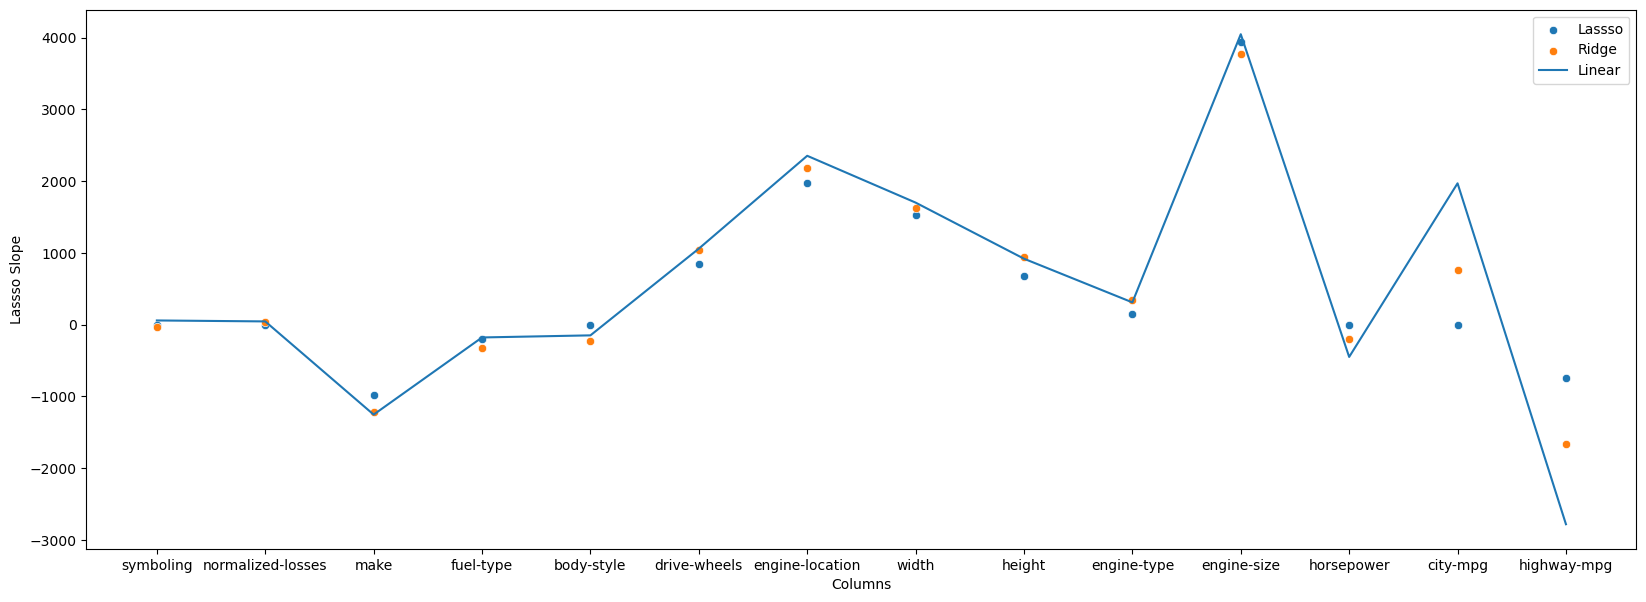

In [44]:
plt.figure(figsize=(20,7))
sns.scatterplot(data=dict3, x='Columns', y='Lassso Slope', label='Lassso')
sns.scatterplot(data=dict3, x='Columns', y='Ridge Slope', label='Ridge')
sns.lineplot(data=dict3, x='Columns', y='Linear Slope', label='Linear')
plt.legend()

In [45]:
print ('Testing score L2:', test_score_L2)
print ('Testing score L1:', test_score_L1)

Testing score L2: 0.8053
Testing score L1: 0.8111


In [46]:
'''If test score of both regularisation are same then apply cross validation'''

'If test score of both regularisation are same then apply cross validation'

In [47]:
'''
cross validation in Lasso, Lambda=200
'''
from sklearn.model_selection import cross_val_score
L1=Lasso(200)
#First applying scaling on input X
X = ss.fit_transform(X)
cross_lasso = cross_val_score(L1,X,Y,cv=4)
#cv inbuilt parameter of cross_val_score(), we pass cv=4 means splits value in 4 equal parts 
print(cross_lasso)
print('Mean: ',cross_lasso.mean().round(4))

[0.6574392  0.86162432 0.40767762 0.57945389]
Mean:  0.6265


In [48]:
cross_ridge = cross_val_score(L2,X,Y,cv=4)
print(cross_ridge)
print('Mean: ',cross_ridge.mean().round(4)) 

[0.66976843 0.85535065 0.38355525 0.53524031]
Mean:  0.611


In [49]:
cross_linear = cross_val_score(lr,X,Y,cv=4)
print(cross_linear)
print('Mean: ',cross_linear.mean().round(4)) 

[0.66862737 0.85491332 0.36612566 0.48027491]
Mean:  0.5925


In [50]:
'''
Thus seems like Lasso regularisation seems good as the mean of lasso > mean of ridge
'''

'\nThus seems like Lasso regularisation seems good as the mean of lasso > mean of ridge\n'